# Loan Default Prediction - Data Preparation

In this notebook, we'll prepare the data for Machine Learning algorithms to make them perform better. In the scope of this part of the study, we'll:

- We'll check the number of unique values for each column.
- We'll drop the duplicated records.
- Handle missing values.
- Handle outliers.
- Scale the numeric values.
- Encode the categorical values.

At the end of this notebook will save the prepared data into a .csv file which will be used as an input to the predictive model study.

# Import Libraries

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
# Display only 3 digits after floating point in pandas objects
pd.set_option('display.float_format', lambda x:'%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# Configure default settings for plots
sb.set(style='ticks')
sb.set_palette('Paired')
plt.rcParams['axes.spines.top'] = False     # Remove top border
plt.rcParams['axes.spines.right'] = False   # Remove righr border

# Load Data

## Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/My Drive/Colab Notebooks/Capstone-Project-Loan-Default-Prediction

/content/drive/My Drive/Colab Notebooks/Capstone-Project-Loan-Default-Prediction


In [4]:
# Set directorty paths as global variable
data_path = './Data/Raw/'

data = pd.read_csv(data_path + 'hmeq.csv')

# Create a copy of the dataframe to secure it against changes
df = data.copy()
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.000,39025.000,HomeImp,Other,10.500,0.000,0.000,94.367,1.000,9.000,NaN
1,1,1300,70053.000,68400.000,HomeImp,Other,7.000,0.000,2.000,121.833,0.000,14.000,NaN
2,1,1500,13500.000,16700.000,HomeImp,Other,4.000,0.000,0.000,149.467,1.000,10.000,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.000,112000.000,HomeImp,Office,3.000,0.000,0.000,93.333,0.000,14.000,NaN


In [5]:
# Convert the data type of these columns as explained in the EDA notebook
df[['DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'BAD']] = df[['DEROG', 'DELINQ',
                                                      'CLAGE', 'NINQ', 'BAD']].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   object 
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   object 
 8   DELINQ   5380 non-null   object 
 9   CLAGE    5652 non-null   object 
 10  NINQ     5450 non-null   object 
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 605.4+ KB


# Handling Missing Values

In [6]:
def check_missing_values(data):
    '''
    Prints the number of features with missing values and it's percentage
    in the dataset.

    ---
    ###Parameters
    data <dataframe>: tabular data in data frame format.
    '''
    # Get columns with null values only
    count = data.isnull().sum()[data.isnull().sum() > 0]
    percentage = ((count / data.shape[0]) * 100)

    print(count.shape[0], 'colum(s) has missing values')
    print('-'*50)
    # Display the number of missing values and percentage of missing values to the total number of values for each column
    print(pd.DataFrame({'Count':count, 'Percentage':percentage}))

    # Display the missing values in a heatmap
    plt.figure(figsize=(10, 6))
    sb.heatmap(data.isnull(), yticklabels=False, cmap='cividis', cbar=False)
    plt.show(block=False)




11 colum(s) has missing values
--------------------------------------------------
         Count  Percentage
MORTDUE    518       8.691
VALUE      112       1.879
REASON     252       4.228
JOB        279       4.681
YOJ        515       8.641
DEROG      708      11.879
DELINQ     580       9.732
CLAGE      308       5.168
NINQ       510       8.557
CLNO       222       3.725
DEBTINC   1267      21.258


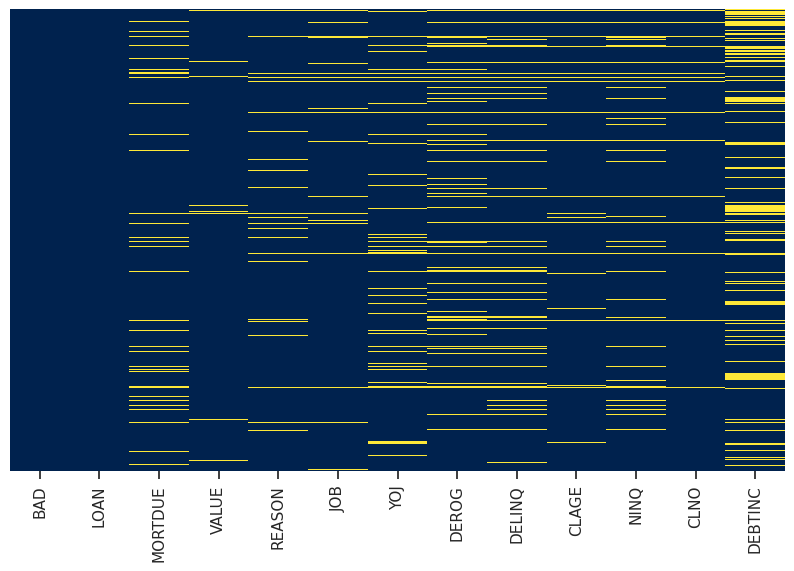

In [7]:
check_missing_values(df)

🔎 **Observations:** As mentioned the Data Overview section the feature with the highest number of missing values is DEBTINC. It has a strong correlation with the target so it's better to impute as much information as possible with this one. It's better to create 2 different version of the dataset as this point.
1. The dataset with all the null values are dropped.
2. The dataset null values are imputed as much as possible. This can have further  variants like:
    
    A. Using KNN imputer

    B. Manual imputing

Then these datasets can be fed to the models and perform the performance of the model.

### Dropping Missing Values

In [8]:
df_no_null = df.dropna()
df_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 5 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3364 non-null   object 
 1   LOAN     3364 non-null   int64  
 2   MORTDUE  3364 non-null   float64
 3   VALUE    3364 non-null   float64
 4   REASON   3364 non-null   object 
 5   JOB      3364 non-null   object 
 6   YOJ      3364 non-null   float64
 7   DEROG    3364 non-null   object 
 8   DELINQ   3364 non-null   object 
 9   CLAGE    3364 non-null   object 
 10  NINQ     3364 non-null   object 
 11  CLNO     3364 non-null   float64
 12  DEBTINC  3364 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 367.9+ KB


In [9]:
# Function to create labeled barplots for categorical features
def plot_counts(data, feature, perc = False, n = None, hue = None):
  """
    This function takes the name of the feature and plots the distribution
    of the categorical values and saves the figure for future usage using
    countplot function of seaborn.

    ---
    ### Parameters:
    - data <dataframe>: tabular data in data frame format.
    - feature <string>: Name of categorical column in dataframe to be visualized.
    - perc <bool>: whether to display percentages instead of count (default is False)
    - n <int>: displays the top n category levels (default is None, i.e., display all levels)
  """

  total = len(data[feature])            # How many number of rows are there in the feature?
  num_unique = data[feature].nunique()  # How many unique number of category are there in the feature?

  # Set the size of the figure according to the number of categories to be displayed
  if n is None:
    plt.figure(figsize = (num_unique+1, 5))
  else:
    plt.figure(figsize = (n+1, 5))

  # Set the style of the ticks on x axis
  plt.xticks(rotation=90, fontsize=12)

  # Plot the counts for each category
  ax = sb.countplot(
      data=data,
      x = feature,
      palette = 'Paired',
      order = data[feature].value_counts().index[:n].sort_values(),
      hue = hue
  )

  # Display the percentage of each category on top of the bar
  for p in ax.patches:
    if perc == True:
      label = '{:.1f}%'.format(
          100 * p.get_height() / total  # Display percentage of each class of the category
      )
    else:
      label = p.get_height() # Display count of each level of the category

    x = p.get_x() + p.get_width() / 2 # Width of the plot
    y = p.get_height() # Height of the plot

    rotation = 0
    if hue is not None:
      rotation = 30  # Rotate annotations by 30 degrees if hue is not None


    ax.annotate(
        label,
        (x, y),
        ha = 'center',
        va = 'center',
        size = 12,
        xytext = (0, 5),
        textcoords = 'offset points',
        rotation = rotation
    )
  plt.show()

<ipython-input-9-bd121b0e7cff>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.countplot(


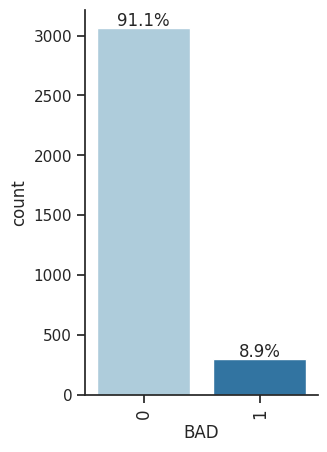

In [10]:
plot_counts(df_no_null, 'BAD', perc=True)

🔎 **Observations:** As you can be see in the [EDA Notebook](Loan_Default_Prediction%20-%20EDA.ipynb) the ratio of the defaulted loans was 20% in the original dataset. The dataset became more imbalanced after dropping all null values. This might have big impact on the generalization performance of the algorithms.

However, since the 21% of the values of DEBTINC is missing, maybe first we should drop this column even though it has a strong relation with the target, then check the balance of the dataset.

In [11]:
df_no_debtinc_no_null = df.drop('DEBTINC', axis=1).dropna()
df_no_debtinc_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4247 entries, 0 to 5959
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      4247 non-null   object 
 1   LOAN     4247 non-null   int64  
 2   MORTDUE  4247 non-null   float64
 3   VALUE    4247 non-null   float64
 4   REASON   4247 non-null   object 
 5   JOB      4247 non-null   object 
 6   YOJ      4247 non-null   float64
 7   DEROG    4247 non-null   object 
 8   DELINQ   4247 non-null   object 
 9   CLAGE    4247 non-null   object 
 10  NINQ     4247 non-null   object 
 11  CLNO     4247 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 431.3+ KB


<ipython-input-9-bd121b0e7cff>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.countplot(


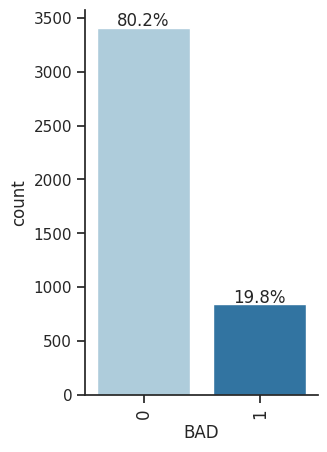

In [12]:
plot_counts(df_no_debtinc_no_null, 'BAD', perc=True)

🔎 **Observations:** As you can see we could manage to preserve the balance and had more datapoints with this approach. However, considering the relation, we might lost a strong predictor for the model. Let's keep both and check the model performance for both datasets.

In [13]:
df_no_null.to_csv('./Data/Processed/hmeq_no_null.csv', index=False)
df_no_debtinc_no_null.to_csv('./Data/Processed/hmeq_no_debtinc_no_null.csv', index=False)

### Imputing Missing Values

In this section, we'll impute the missing values $k$ -NN Imputer.

In [14]:
# Import LabelEncoder to encode string values in the object columns so KNN Imputer can work
from sklearn.preprocessing import LabelEncoder

In [15]:
df['REASON'].value_counts()

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

In [16]:
df['REASON'].isnull().sum()

252

In [17]:
label_encoder = LabelEncoder()

# Replace NaN with a placeholder value (e.g., 'Unknown')
df['REASON'].fillna('Unknown', inplace=True)
df['REASON'] = label_encoder.fit_transform(df['REASON'])
# To get the mapping of encoded values to original categories
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapping)
# Revert placeholder values back to NaN
df['REASON'] = np.where(df['REASON'] == label_encoder.transform(['Unknown'])[0], np.nan, df['REASON'])

{'DebtCon': 0, 'HomeImp': 1, 'Unknown': 2}


In [18]:
# Do the same for JOB column
df['JOB'].fillna('Unknown', inplace=True)
df['JOB'] = label_encoder.fit_transform(df['JOB'])
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapping)
df['JOB'] = np.where(df['JOB'] == label_encoder.transform(['Unknown'])[0], np.nan, df['JOB'])

{'Mgr': 0, 'Office': 1, 'Other': 2, 'ProfExe': 3, 'Sales': 4, 'Self': 5, 'Unknown': 6}


In [19]:
# Import KNN Imputer library
from sklearn.impute import KNNImputer

In [20]:
# Impute the missing values using 5 number of neighbors
imputer = KNNImputer(n_neighbors=5)

x = df.drop('BAD', axis=1)
imputer.fit(x)
x_imputed = imputer.transform(x)

In [21]:
# Check if all the null values are imputed
print(sum(np.isnan(x_imputed).flatten()))

0


In [22]:
# Convert the imputed numpy array into DataFrame object
df_imputed = pd.DataFrame(x_imputed, columns=df.drop('BAD', axis=1).columns)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     5960 non-null   float64
 1   MORTDUE  5960 non-null   float64
 2   VALUE    5960 non-null   float64
 3   REASON   5960 non-null   float64
 4   JOB      5960 non-null   float64
 5   YOJ      5960 non-null   float64
 6   DEROG    5960 non-null   float64
 7   DELINQ   5960 non-null   float64
 8   CLAGE    5960 non-null   float64
 9   NINQ     5960 non-null   float64
 10  CLNO     5960 non-null   float64
 11  DEBTINC  5960 non-null   float64
dtypes: float64(12)
memory usage: 558.9 KB


In [23]:
# Since we performed imputation on features, we need to add target values to the imputed dataframe
df_imputed = pd.concat([df_imputed, df['BAD']], axis=1)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     5960 non-null   float64
 1   MORTDUE  5960 non-null   float64
 2   VALUE    5960 non-null   float64
 3   REASON   5960 non-null   float64
 4   JOB      5960 non-null   float64
 5   YOJ      5960 non-null   float64
 6   DEROG    5960 non-null   float64
 7   DELINQ   5960 non-null   float64
 8   CLAGE    5960 non-null   float64
 9   NINQ     5960 non-null   float64
 10  CLNO     5960 non-null   float64
 11  DEBTINC  5960 non-null   float64
 12  BAD      5960 non-null   object 
dtypes: float64(12), object(1)
memory usage: 605.4+ KB


In [24]:
df_imputed['REASON'].value_counts()

0.000    3966
1.000    1805
0.600      61
0.400      53
0.800      41
0.200      34
Name: REASON, dtype: int64

✍🏼 **Note:** As you can see on the above table, kNN imputer filled the missing values in float format. That's why to protect the existing data types, we need to convert these features into integers.

In [25]:
obj_columns = ['REASON', 'JOB', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'BAD']
df_imputed[obj_columns] = df_imputed[obj_columns].astype('int64')
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     5960 non-null   float64
 1   MORTDUE  5960 non-null   float64
 2   VALUE    5960 non-null   float64
 3   REASON   5960 non-null   int64  
 4   JOB      5960 non-null   int64  
 5   YOJ      5960 non-null   float64
 6   DEROG    5960 non-null   int64  
 7   DELINQ   5960 non-null   int64  
 8   CLAGE    5960 non-null   int64  
 9   NINQ     5960 non-null   int64  
 10  CLNO     5960 non-null   float64
 11  DEBTINC  5960 non-null   float64
 12  BAD      5960 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 605.4 KB


In [26]:
df_imputed['REASON'].value_counts()

0    4155
1    1805
Name: REASON, dtype: int64

In [27]:
df_imputed['DEBTINC'].value_counts()

27.123    13
26.223     8
26.223     5
27.028     5
24.356     4
          ..
34.192     1
31.459     1
35.558     1
39.678     1
34.572     1
Name: DEBTINC, Length: 5897, dtype: int64

In [28]:
# Extract it to a .csv file
df_imputed.to_csv('./Data/Processed/hmeq_knn_imputed.csv', index=False)

# Handling Outliers

In [32]:
# Create lists numeric columns
num_cols = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        num_cols.append(column)

print(f'Numeric columns: {len(num_cols)}', num_cols)

Numeric columns: 8 ['LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'CLNO', 'DEBTINC']


In [37]:
def plot_outliers(data, columns):
  # number of columns of the subplots
  n_cols = 2
  # set the number of rows with the predefined number of columns
  n_rows = int(np.ceil(len(columns)/n_cols))

  # Create figure
  fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
  # Flatten the axes array for easier indexing
  ax = ax.flatten()

  for i in range(len(columns)):
    sb.boxplot(data=data, x=columns[i],
              color='lightblue', ax=ax[i])

  # If the number of features is odd, remove the empty subplot
  if len(columns) % 2 != 0:
      fig.delaxes(ax[-1])

  plt.tight_layout()
  plt.show(block=False)

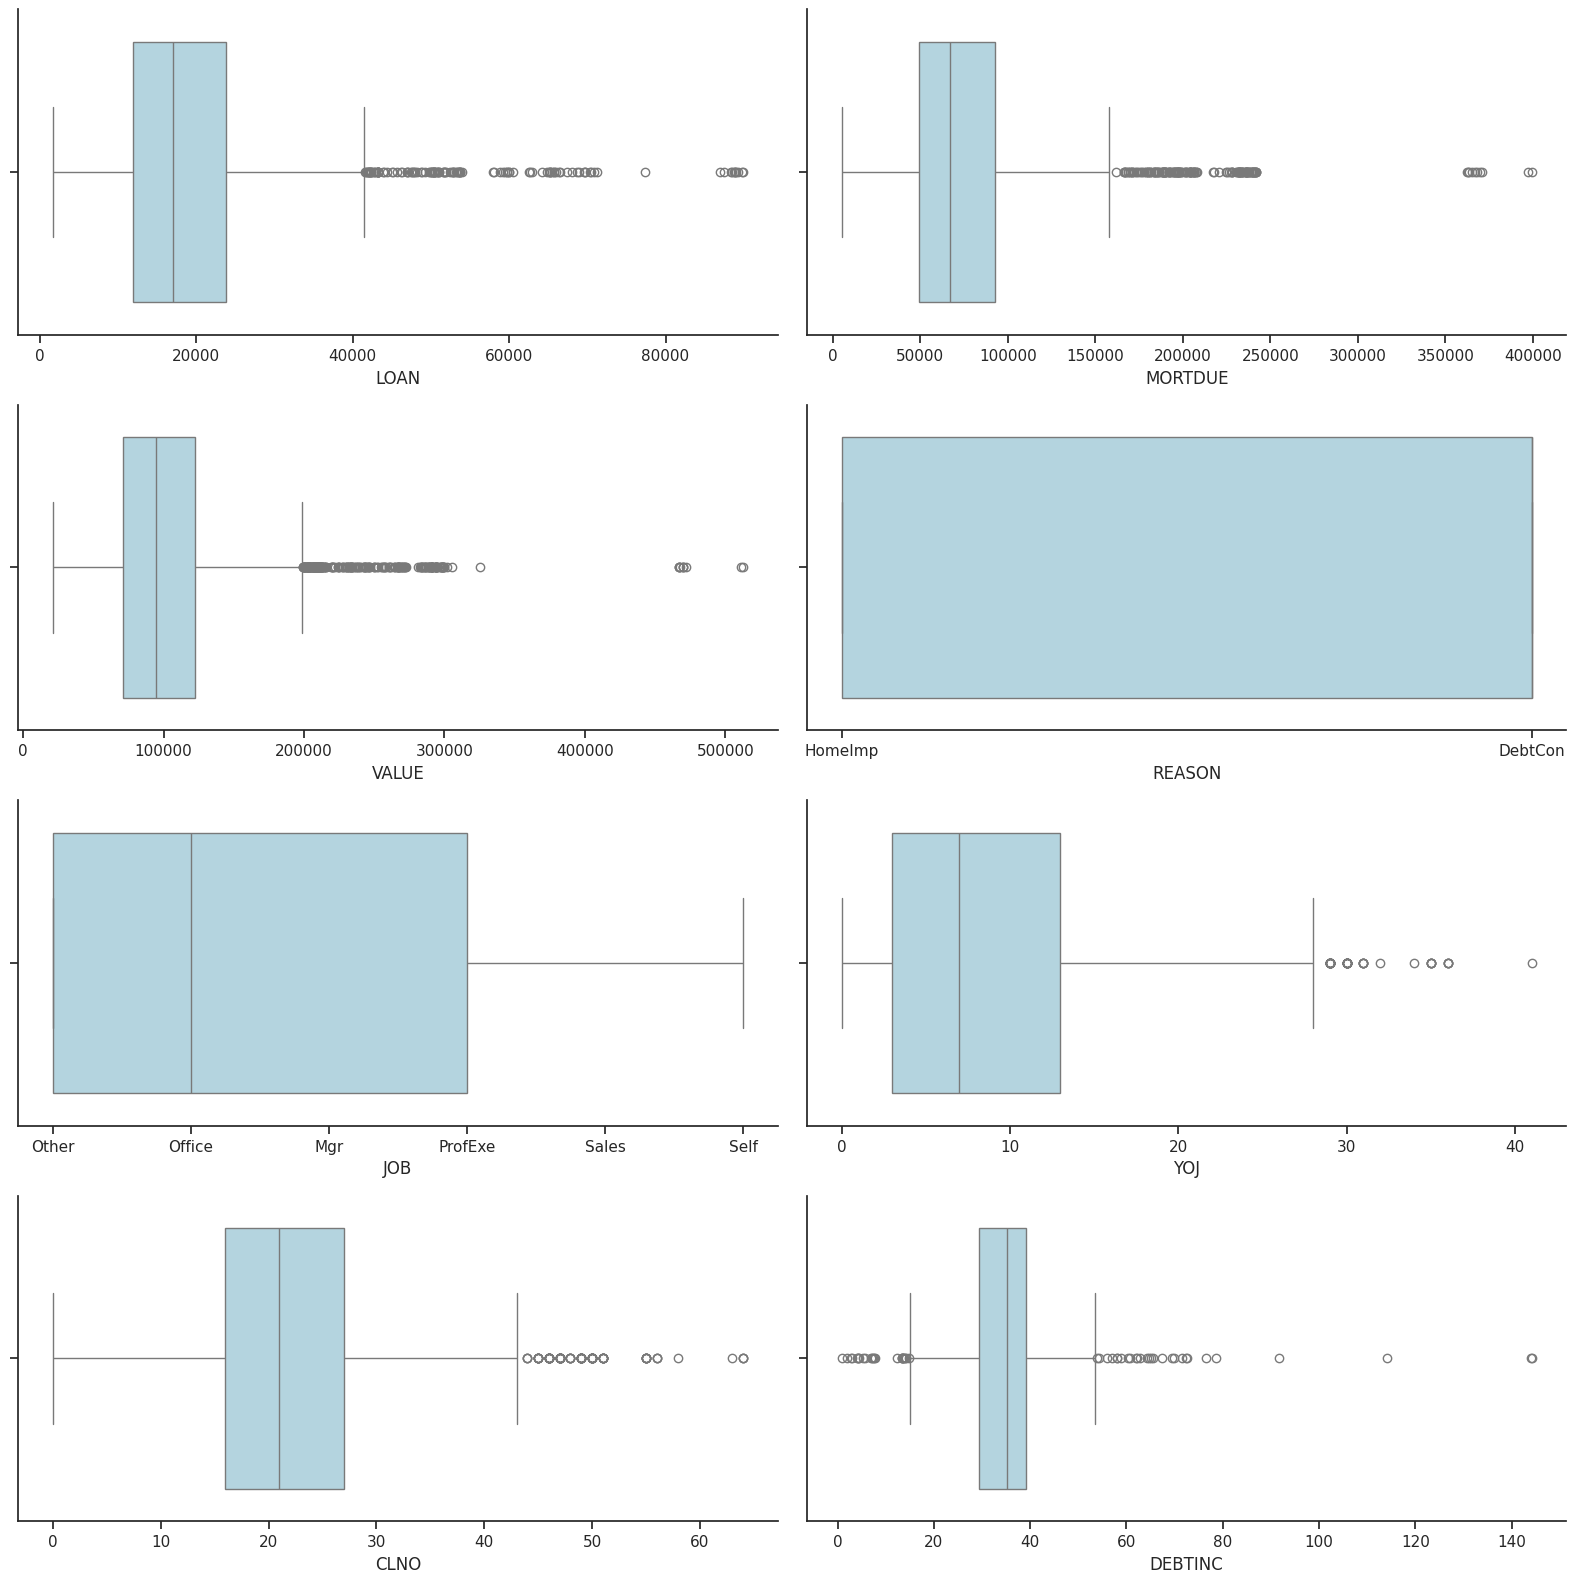

In [38]:
plot_outliers(df_no_null, num_cols)

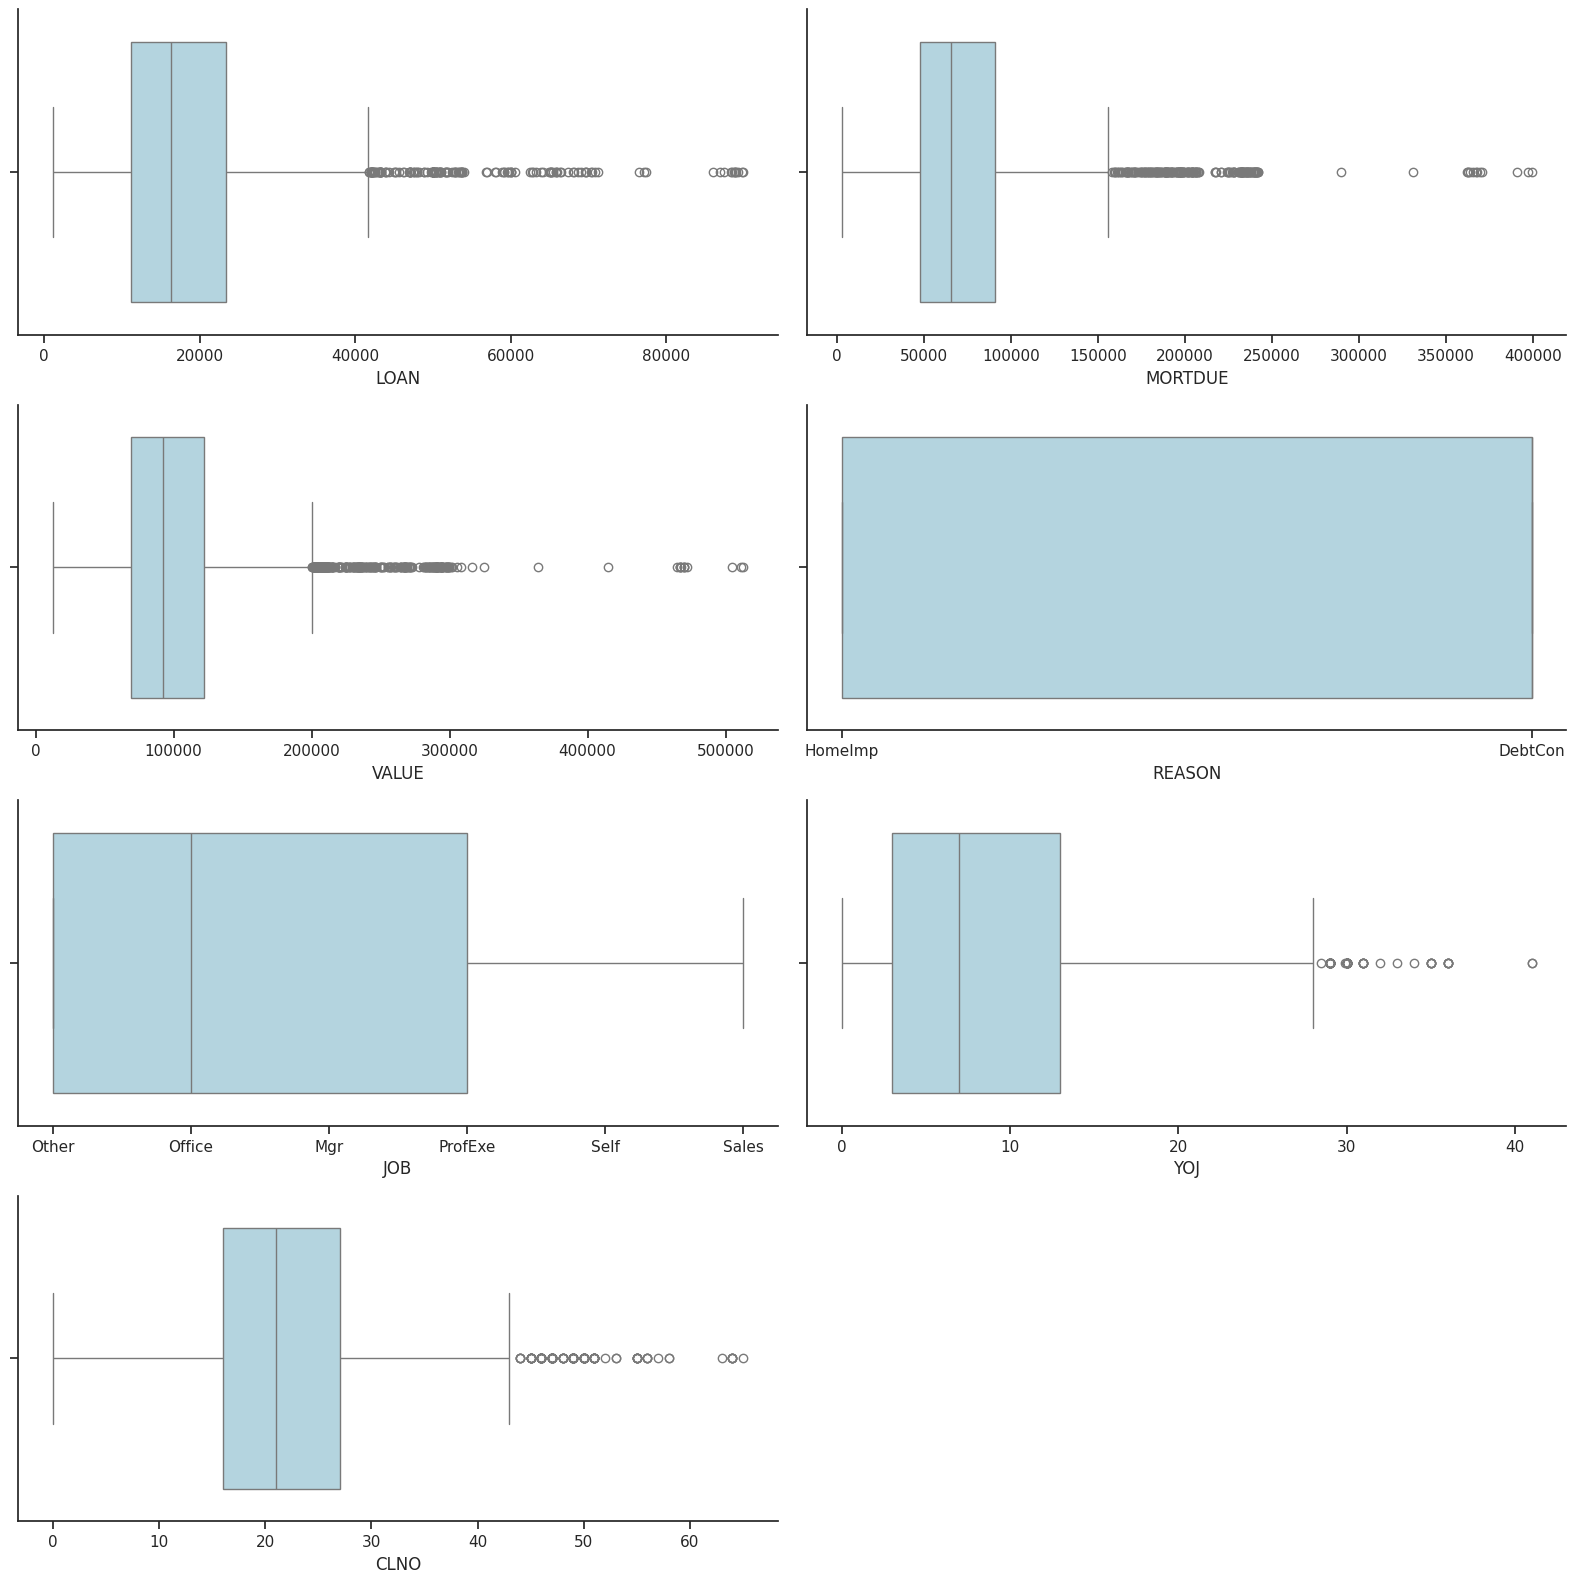

In [39]:
cols = num_cols.copy()
cols.remove('DEBTINC')
plot_outliers(df_no_debtinc_no_null, cols)

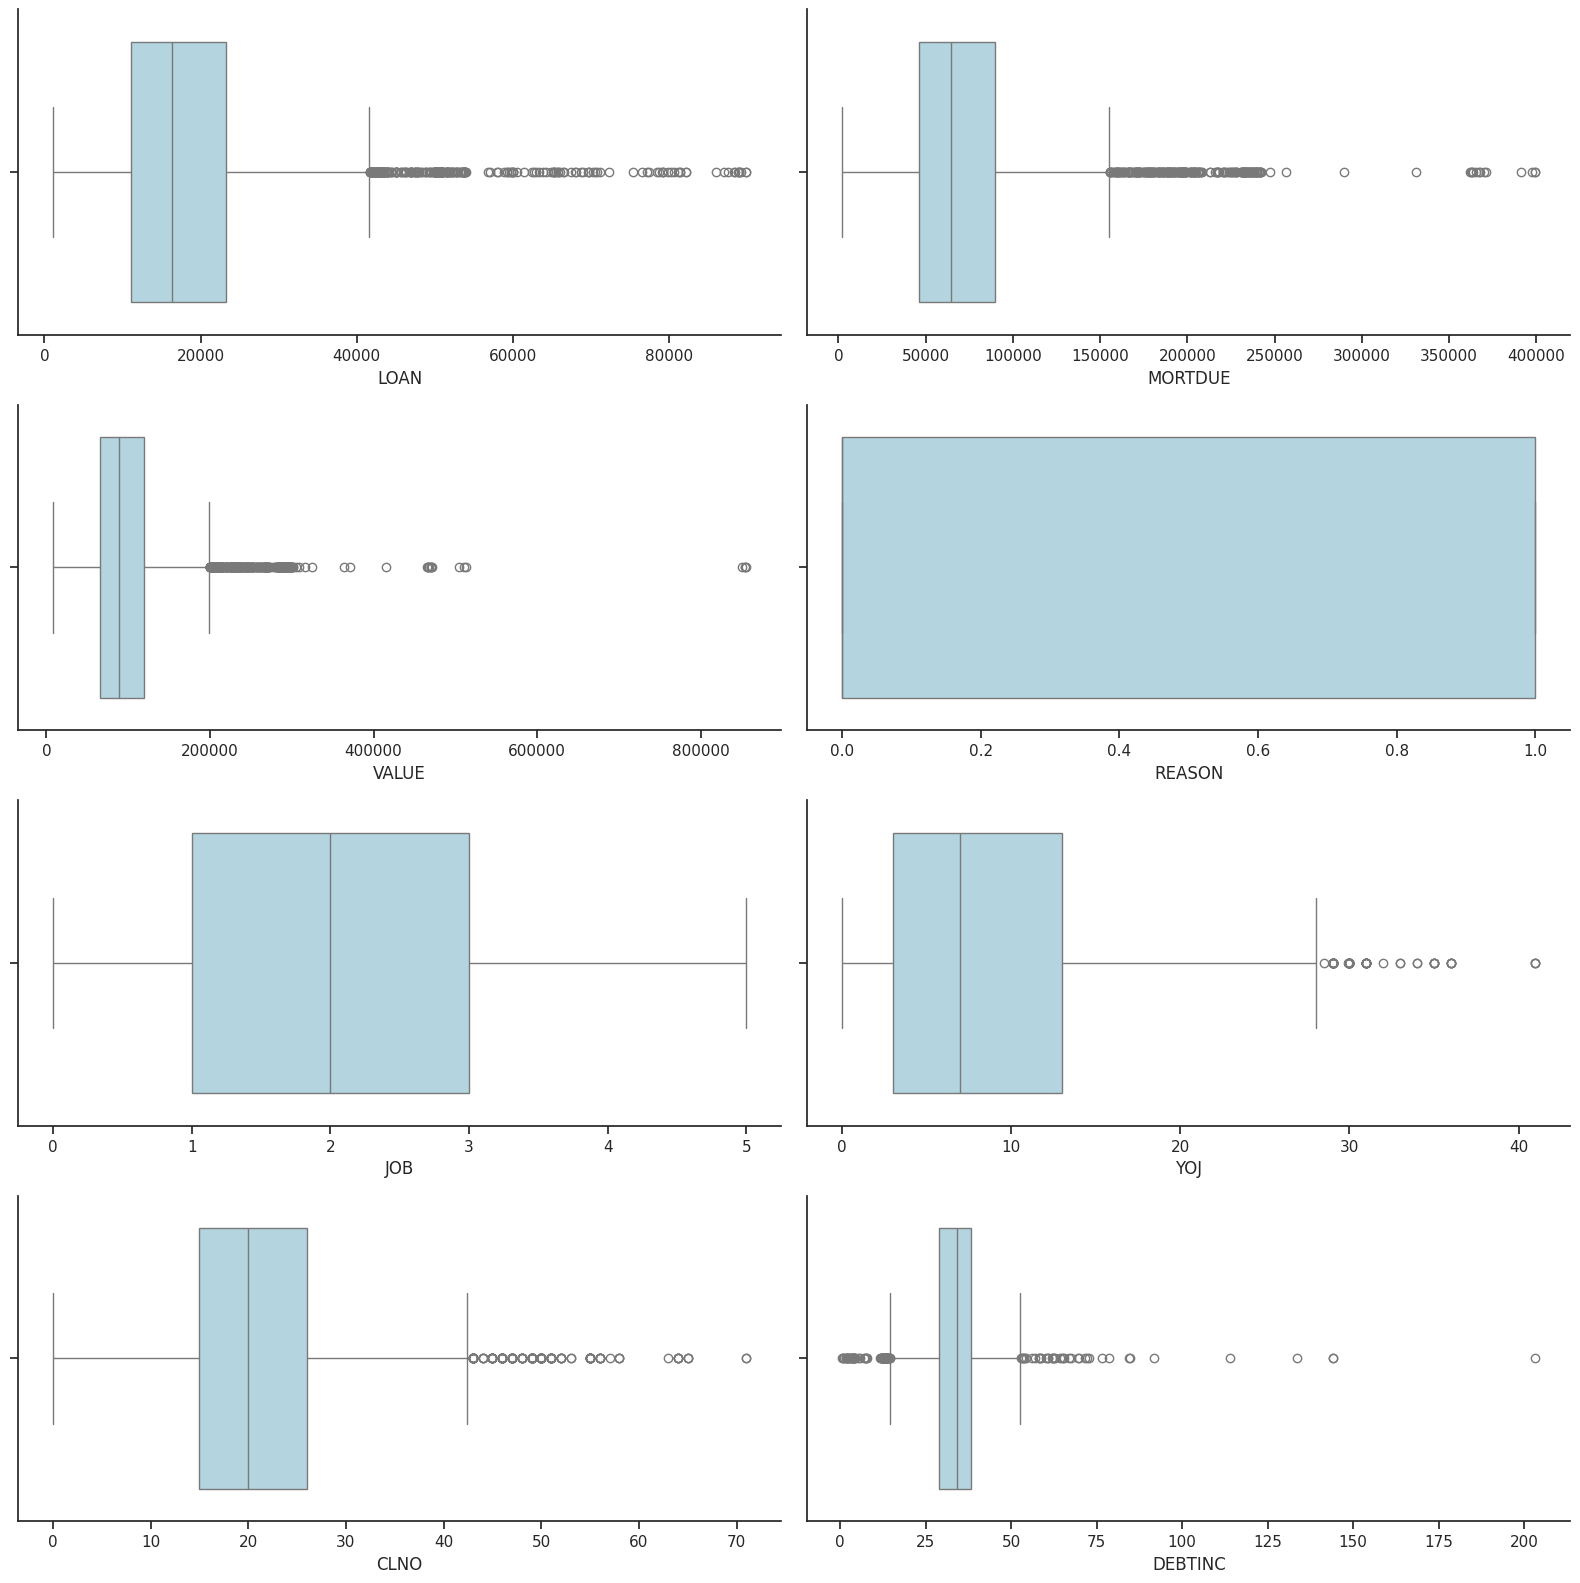

In [40]:
plot_outliers(df_imputed, num_cols)

🔎 **Observations:**